In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

C:\Users\Shin\Anaconda3\envs\tensorflow_windows\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11493376/11490434 [==============================] - 11s 1us/step


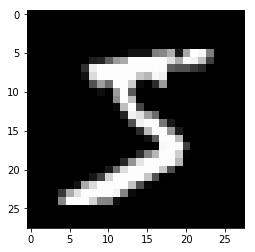

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
# Reshaping the training data to have to have only 2 dimensions
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Fully Connected Model

In [47]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

In [48]:
K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 570,602
Trainable params: 570,602
Non-trainable params: 0
_________________________________________________________________


In [50]:
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.2795 - acc: 0.9146 - val_loss: 0.1092 - val_acc: 0.9657
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0963 - acc: 0.9709 - val_loss: 0.1247 - val_acc: 0.9633
Epoch 3/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.0649 - acc: 0.9805 - val_loss: 0.1145 - val_acc: 0.9681
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0486 - acc: 0.9855 - val_loss: 0.0739 - val_acc: 0.9798
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0364 - acc: 0.9886 - val_loss: 0.0978 - val_acc: 0.9768
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.0310 - acc: 0.9911 - val_loss: 0.0717 - val_acc: 0.9805
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.0240 - acc: 0.9930 - val_loss: 0.0745 - val_acc

Text(0.5,0,u'Epochs')

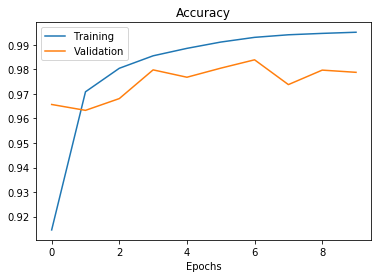

In [51]:
# plotting
# Note, if training acc is higher than val_acc, it probably means it's overfitting
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [52]:
test_accuracy = model.evaluate(X_test, y_test_cat)[0]
test_accuracy

10000/10000 [==============================] - 1s 55us/step


0.11762456628208429

## Feature Extraction?

Feature Vector
- Fourier Transform
- Wavelet
- Histogram of Oriented Gradients
- Local Binary Patterns
- Color histogram

What enables you find the local patterns?
- Convolutions => automatically detect local patterns

### Tensors

Order / Name / Exmaple / Shape

0 / Scalar / 3 / No shape

1 / Vector / [1, 0, 2] / (3, )

2 / Matrix / [[0, 1, 1], [12, 2, 3]] / (2, 3)

3 / Tensors / [[[0, 1, 5], [1, 3, 4]], [...]]]  


### Coloured Image

- Images contain RGB
- RGB can be represented as order 3 tensors
    (c, h, w)
    (h, w, c)

In [32]:
# Exploring tensors
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [17]:
A

array([[[[0, 5, 4, 1, 6],
         [9, 5, 9, 7, 7],
         [1, 7, 2, 4, 6],
         [0, 2, 1, 2, 9]],

        [[2, 3, 7, 2, 3],
         [5, 9, 6, 0, 9],
         [9, 2, 8, 3, 1],
         [9, 9, 0, 2, 0]],

        [[1, 3, 3, 1, 0],
         [4, 6, 0, 6, 8],
         [7, 6, 3, 7, 6],
         [5, 3, 0, 5, 1]]],


       [[[6, 0, 5, 2, 5],
         [8, 3, 9, 7, 1],
         [1, 8, 1, 3, 7],
         [4, 9, 6, 0, 6]],

        [[0, 2, 0, 3, 3],
         [5, 7, 9, 6, 0],
         [8, 4, 5, 3, 9],
         [5, 0, 2, 6, 7]],

        [[0, 6, 5, 1, 3],
         [9, 3, 2, 0, 2],
         [1, 6, 9, 8, 0],
         [9, 6, 6, 1, 8]]]])

In [18]:
B

array([[9, 8, 1],
       [5, 9, 2]])

In [20]:
A[0, 1, 0, 3]

2

In [21]:
stupid_image = np.random.randint(255, size=(4, 4, 3), dtype='uint8')

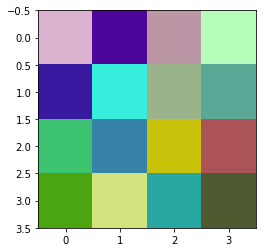

In [23]:
plt.imshow(stupid_image)

Text(0.5,1,'Blue channel')

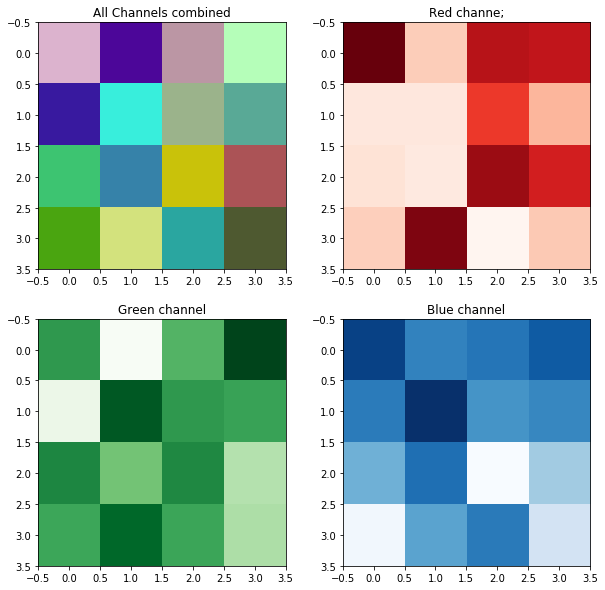

In [28]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(stupid_image)
plt.title('All Channels combined')

plt.subplot(222)
plt.imshow(stupid_image[:, :, 0], cmap='Reds')
plt.title('Red channe;')

plt.subplot(223)
plt.imshow(stupid_image[:, :, 1], cmap='Greens')
plt.title('Green channel')

plt.subplot(224)
plt.imshow(stupid_image[:, :, 2], cmap='Blues')
plt.title('Blue channel')

In [29]:
A + A

array([[[[ 0, 10,  8,  2, 12],
         [18, 10, 18, 14, 14],
         [ 2, 14,  4,  8, 12],
         [ 0,  4,  2,  4, 18]],

        [[ 4,  6, 14,  4,  6],
         [10, 18, 12,  0, 18],
         [18,  4, 16,  6,  2],
         [18, 18,  0,  4,  0]],

        [[ 2,  6,  6,  2,  0],
         [ 8, 12,  0, 12, 16],
         [14, 12,  6, 14, 12],
         [10,  6,  0, 10,  2]]],


       [[[12,  0, 10,  4, 10],
         [16,  6, 18, 14,  2],
         [ 2, 16,  2,  6, 14],
         [ 8, 18, 12,  0, 12]],

        [[ 0,  4,  0,  6,  6],
         [10, 14, 18, 12,  0],
         [16,  8, 10,  6, 18],
         [10,  0,  4, 12, 14]],

        [[ 0, 12, 10,  2,  6],
         [18,  6,  4,  0,  4],
         [ 2, 12, 18, 16,  0],
         [18, 12, 12,  2, 16]]]])

In [31]:
A.shape

(2, 3, 4, 5)

# 1D Convolution

In [34]:
a = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype='float32')

In [35]:
b = np.array([-1, 1], dtype='float32')

In [36]:
c = np.convolve(a, b)

In [37]:
c

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.], dtype=float32)

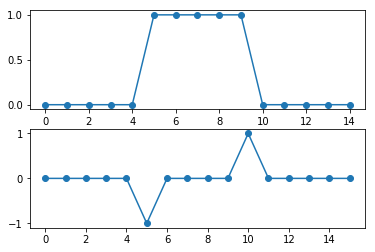

In [40]:
# Whenever two numbers in a are equal, it will sum up
plt.subplot(211)
plt.plot(a, 'o-')

plt.subplot(212)
plt.plot(c, 'o-')

# 2D Convolution

In [41]:
# Watch https://www.udemy.com/zero-to-deep-learning/learn/v4/t/lecture/7042734?start=0

In [42]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [47]:
img = misc.ascent()

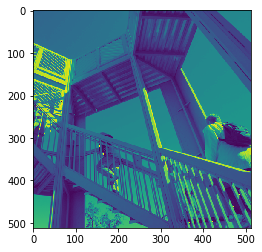

In [48]:
plt.imshow(img)

In [55]:
img.shape

(512, 512)

In [49]:
h_kernel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

In [56]:
h_kernel.shape

(3, 3)

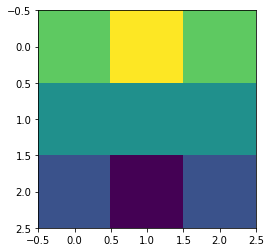

In [50]:
plt.imshow(h_kernel)

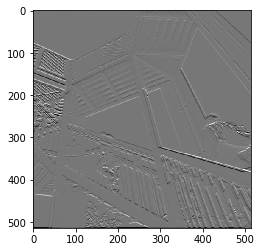

In [54]:
res = convolve2d(img, h_kernel)
# Only highling horizontal contrast lines
# Vertical = invisible
# Diagonal = visible
plt.imshow(res, cmap='gray')

## Notes

- In 2D images are order 4 tensors (N, W, H, C) 
   - Number of images, width, height, channels
   - For example mnist (6000 images, 28 x 28, 1 gray scale)
   
- Order 4 tensor
  - (H, W, C, C)
  - H: Height
  - W: weight
  - C: Channels in input
  - C: channels in output (number of filters)
- (3, 3, 1, 2)
- 3 x 3 filter
- 1 color channel
- 2 patches




- What is strides e.g. (1, 1)?
   - We slide window by 1 vertically and 1 horizontally
   
   
   
- We can reserve borders by using *paddings*

In [65]:
from keras.layers import Conv2D
from keras.models import Sequential

In [66]:
img.shape

(512, 512)

In [67]:
# 1 image, w = 512, h = 512, channel = 1
img_tensor = img.reshape((1, 512, 512, 1))

In [70]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2, 1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 255, 510, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Simple feedfowarding through single Conv2D layer
img_pred_tensor = model.predict(img_tensor)

In [72]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [74]:
img_pred = img_pred_tensor[0, :, :, 0]

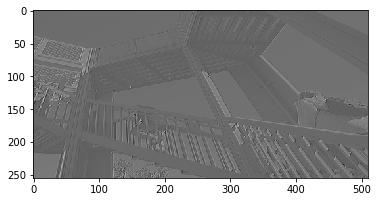

In [75]:
plt.imshow(img_pred, cmap='gray')

In [78]:
weights = model.get_weights()

In [82]:
# 3 x 3 filter
# 1 channel for input
# 1 channel for output
weights[0].shape

(3, 3, 1, 1)

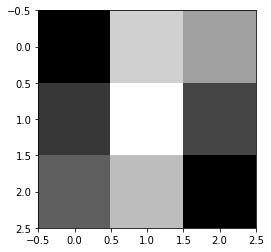

In [83]:
# displaying filter
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [84]:
# Basically taking all 9 pixels
weights[0] = np.ones(weights[0].shape)

In [86]:
model.set_weights(weights)

In [87]:
img_pred_tensor = model.predict(img_tensor)

In [88]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [89]:
img_pred = img_pred_tensor[0, :, :, 0]

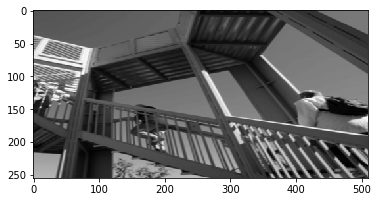

In [90]:
plt.imshow(img_pred, cmap='gray')

In [91]:
weights = model.get_weights()

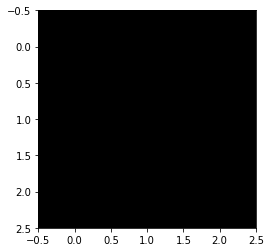

In [92]:
# displaying filter
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [96]:
# extra: maintaining the padding

model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')
model.summary()

# Simple feedfowarding through single Conv2D layer
img_pred_tensor = model.predict(img_tensor)

img_pred_tensor.shape

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 512, 512, 1)       10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


(1, 512, 512, 1)

# Maxpooling

- For example in  3 x 3 patch, it will pick the maximum value
- Applying maxpooling reduces the image size

In [97]:
from keras.layers import MaxPool2D, AvgPool2D

In [103]:
model = Sequential()
# If stride is not set, it will default to the pool size
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_3 (MaxPooling2 (None, 102, 102, 1)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [104]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

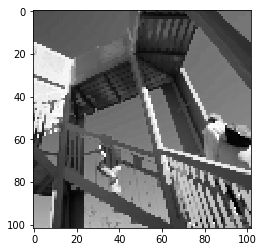

In [105]:
plt.imshow(img_pred, cmap='gray')

In [106]:
model = Sequential()
# If stride is not set, it will default to the pool size
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_1 (Average (None, 102, 102, 1)       0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [107]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

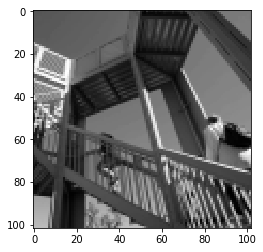

In [108]:
plt.imshow(img_pred, cmap='gray')

# Bringing altogether - Final Architecture

https://www.udemy.com/zero-to-deep-learning/learn/v4/t/lecture/7042756?start=0

In [112]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [114]:
X_train.shape

(60000, 28, 28, 1)

In [125]:
from keras.layers import Flatten, Activation, Dense
import keras.backend as K

In [127]:
K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), ))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [128]:
h = model.fit(X_train, y_train_cat, epochs=2, batch_size=128,
             verbose=1, validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 17s 416us/step - loss: 0.2553 - acc: 0.9241 - val_loss: 0.1599 - val_acc: 0.9511
Epoch 2/2
42000/42000 [==============================] - 18s 419us/step - loss: 0.0766 - acc: 0.9771 - val_loss: 0.0825 - val_acc: 0.9742


In [130]:
model.evaluate(X_test, y_test_cat)

10000/10000 [==============================] - 1s 127us/step


[0.07178632088759913, 0.9779]